# Data Analysis of the California Housing Ensemble

## Using K-Means and Supervised Models

In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import joblib

**STEP 1: PROBLEM STATEMENT & DATA COLLECTION**

***1.1 PROBLEM STATEMENT***

**Goal-** to classify houses based on their geographic region and median income using the California Housing dataset. This project involves clustering houses into groups using unsupervised learning (K-Means) and then leveraging these clusters to train a supervised classification model.

***1.2 DATA COLLECTION***

In [3]:
housing_df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing_df.to_csv("../data/raw/housing.csv", index=False)

In [28]:
# Obtaining Dataset dimensions:
print("Dataset dimensions:")
print(housing_df.shape)

Dataset dimensions:
(20640, 3)


**STEP 2: DATA CLEANING**

In [8]:
housing_df = housing_df[['Latitude', 'Longitude', 'MedInc']]
housing_df.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


**STEP 3: SPLIT TRAIN & TEST**

In [9]:
X_train, X_test = train_test_split(housing_df, test_size=0.2, random_state=42)

## **MACHINE LEARNING**

**BUILDING A K-MEANS MODEL**

In [11]:
kmeans = KMeans(n_clusters=6, random_state=42)

X_train['cluster'] = kmeans.fit_predict(X_train[['Latitude', 'Longitude', 'MedInc']])

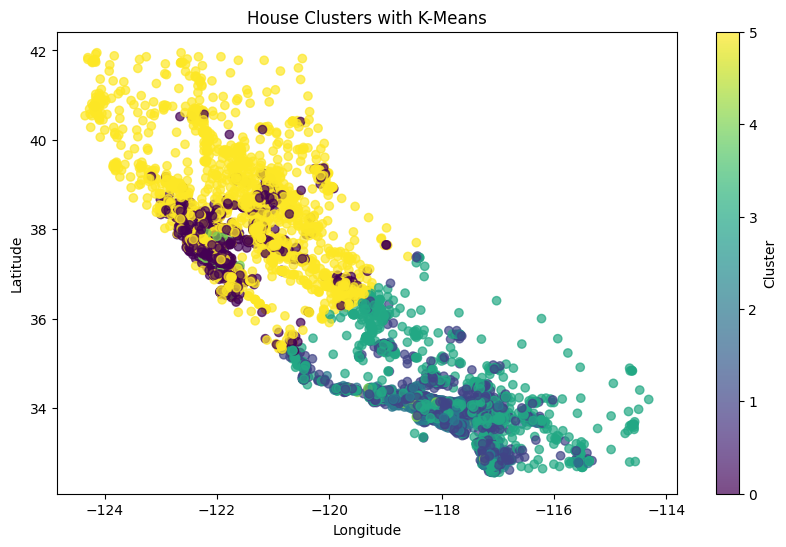

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('House Clusters with K-Means')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
X_test['cluster'] = kmeans.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

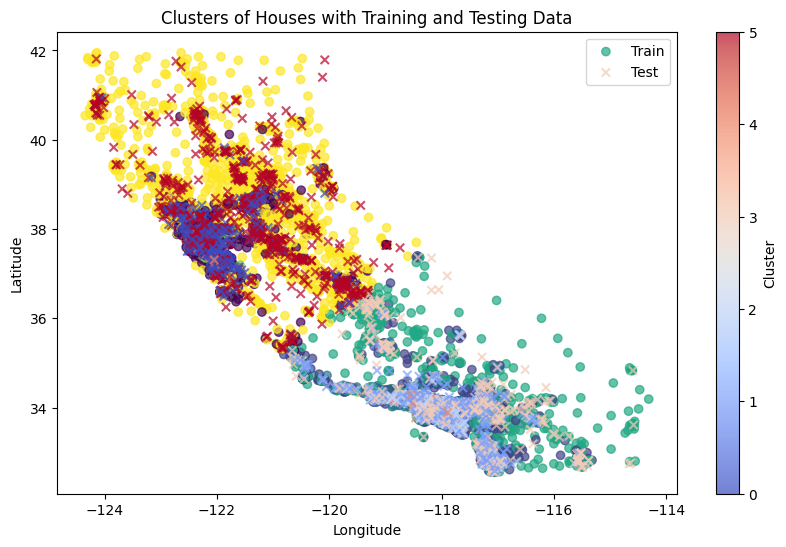

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train['Longitude'], X_train['Latitude'], c=X_train['cluster'], cmap='viridis', alpha=0.7, label='Train')
plt.scatter(X_test['Longitude'], X_test['Latitude'], c=X_test['cluster'], cmap='coolwarm', alpha=0.7, marker='x', label='Test')
plt.colorbar(label='Cluster')
plt.title('Clusters of Houses with Training and Testing Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [18]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train[['Latitude', 'Longitude', 'MedInc']], X_train['cluster'])

RandomForestClassifier(random_state=42)

In [21]:
y_pred = rf.predict(X_test[['Latitude', 'Longitude', 'MedInc']])

In [22]:
print("Classification Report:")
print(classification_report(X_test['cluster'], y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       561
           1       0.99      1.00      1.00       983
           2       0.99      1.00      0.99       299
           3       1.00      1.00      1.00      1111
           4       0.98      0.97      0.98        62
           5       1.00      0.99      1.00      1112

    accuracy                           1.00      4128
   macro avg       0.99      0.99      0.99      4128
weighted avg       1.00      1.00      1.00      4128



## SAVING MODEL

I chose to use **joblib** due to its efficiency in **handling large data** structures, such as those generated by the models trained in the project with a dataset of dimensions (**20640, 3**). Because it is optimized for NumPy arrays and recommended by scikit-learn, **joblib offers greater speed and efficiency** compared to pickle, making it ideal for this case.

In [ ]:
joblib.dump(kmeans, 'kmeans_model_42.joblib')

['kmeans_model_42.joblib']

In [26]:
joblib.dump(rf, 'random_forest_model_42.joblib')

['random_forest_model_42.joblib']